In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/att-database-of-faces/README
/kaggle/input/att-database-of-faces/s32/3.pgm
/kaggle/input/att-database-of-faces/s32/1.pgm
/kaggle/input/att-database-of-faces/s32/9.pgm
/kaggle/input/att-database-of-faces/s32/8.pgm
/kaggle/input/att-database-of-faces/s32/6.pgm
/kaggle/input/att-database-of-faces/s32/7.pgm
/kaggle/input/att-database-of-faces/s32/2.pgm
/kaggle/input/att-database-of-faces/s32/10.pgm
/kaggle/input/att-database-of-faces/s32/4.pgm
/kaggle/input/att-database-of-faces/s32/5.pgm
/kaggle/input/att-database-of-faces/s39/3.pgm
/kaggle/input/att-database-of-faces/s39/1.pgm
/kaggle/input/att-database-of-faces/s39/9.pgm
/kaggle/input/att-database-of-faces/s39/8.pgm
/kaggle/input/att-database-of-faces/s39/6.pgm
/kaggle/input/att-database-of-faces/s39/7.pgm
/kaggle/input/att-database-of-faces/s39/2.pgm
/kaggle/input/att-database-of-faces/s39/10.pgm
/kaggle/input/att-database-of-faces/s39/4.pgm
/kaggle/input/att-database-of-faces/s39/5.pgm
/kaggle/input/att-database-of-faces

In [2]:
path='/kaggle/input/att-database-of-faces'

In [3]:
import numpy as np
import shap
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

In [4]:
images=[]
for person in range(1, 41):
    temp = []
    for pose in range(1, 11):
        image_path = f'{path}/s{person}/{pose}.pgm'
        image = plt.imread(image_path)
        temp.append(image)
    images.append(np.array(temp))
dataset_faces = np.array(images)

# Print the dataset information
print('Total number of datasets:', len(dataset_faces))
print('Dataset size:', dataset_faces.shape)

Total number of datasets: 40
Dataset size: (40, 10, 112, 92)


In [5]:
num_subjects, num_images_per_subject, height, width = dataset_faces.shape
x = dataset_faces.reshape(num_subjects * num_images_per_subject, height, width, 1)  # Adding channel dimension
y = np.repeat(np.arange(num_subjects), num_images_per_subject)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,num_subjects)
y_test=to_categorical(y_test,num_subjects)   

In [6]:
model=Sequential([
    Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.001), activation='relu',strides=1,padding='same',input_shape=(112,92,1)),
    MaxPool2D((2,2)),

    Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu',strides=1,padding='same'),
    MaxPool2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(40,activation='softmax')
])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,validation_split=0.3,batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.0350 - loss: 3.8482 - val_accuracy: 0.0208 - val_loss: 3.8221
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0428 - loss: 3.8108 - val_accuracy: 0.0104 - val_loss: 3.7981
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0424 - loss: 3.7820 - val_accuracy: 0.0104 - val_loss: 3.7844
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0398 - loss: 3.7589 - val_accuracy: 0.0104 - val_loss: 3.7712
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0202 - loss: 3.7410 - val_accuracy: 0.0104 - val_loss: 3.7548
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0365 - loss: 3.7175 - val_accuracy: 0.0312 - val_loss: 3.7601
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0680 - loss: 3.6868 - val_accuracy: 0.0833 - val_loss: 3.7247
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0982 - loss: 3.6729 - val_accuracy: 0.0521 - val_loss

In [8]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy:{test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.7688 - loss: 1.1559
Test accuracy:0.7875000238418579


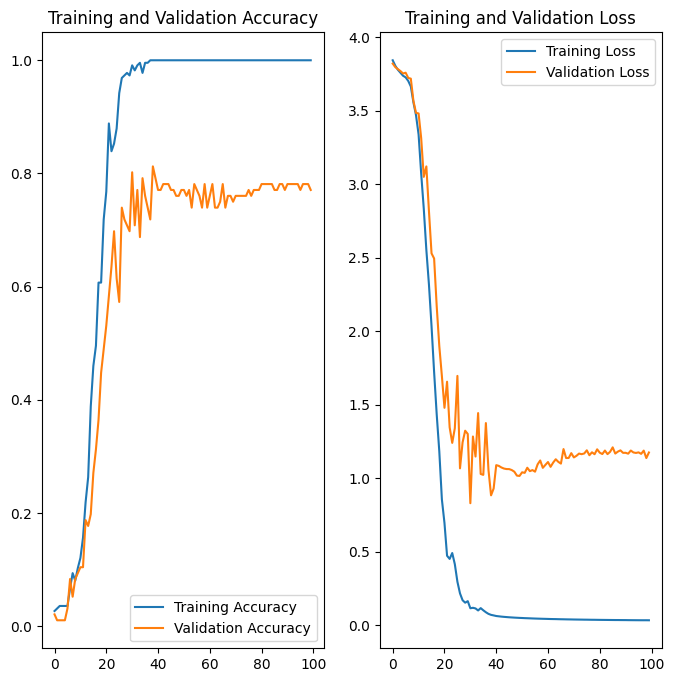

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
Precision: 0.8170833333333334
Recall: 0.7875
F1 Score: 0.7692261904761905


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


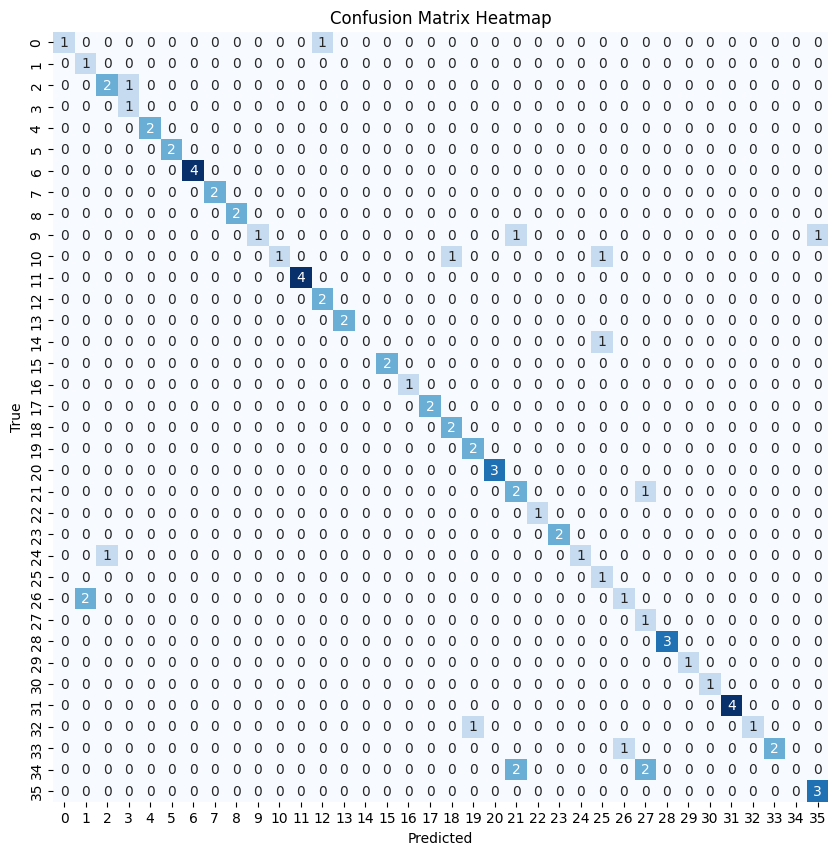

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Applying shap

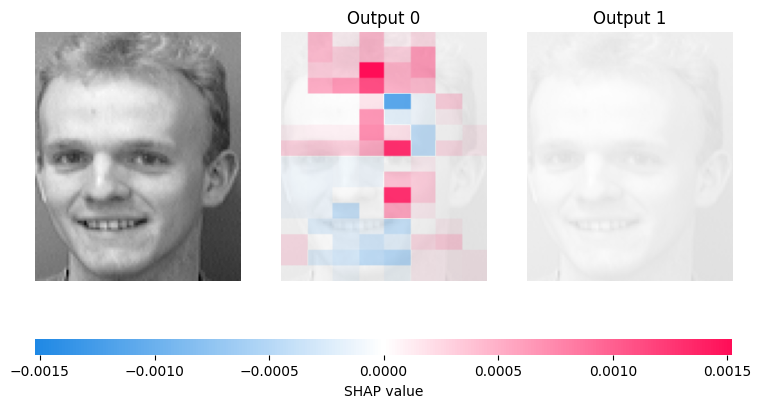

In [12]:
masker = shap.maskers.Image("inpaint_telea", x[0].shape)
explainer = shap.Explainer(model, masker)
shap_values = explainer(x[40:41], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:2])
shap.image_plot(shap_values)

  0%|          | 0/1998 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 2/5 [00:00<?, ?it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 5/5 [00:29<00:00,  3.96s/it]

  0%|          | 0/1998 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [00:36,  9.05s/it]


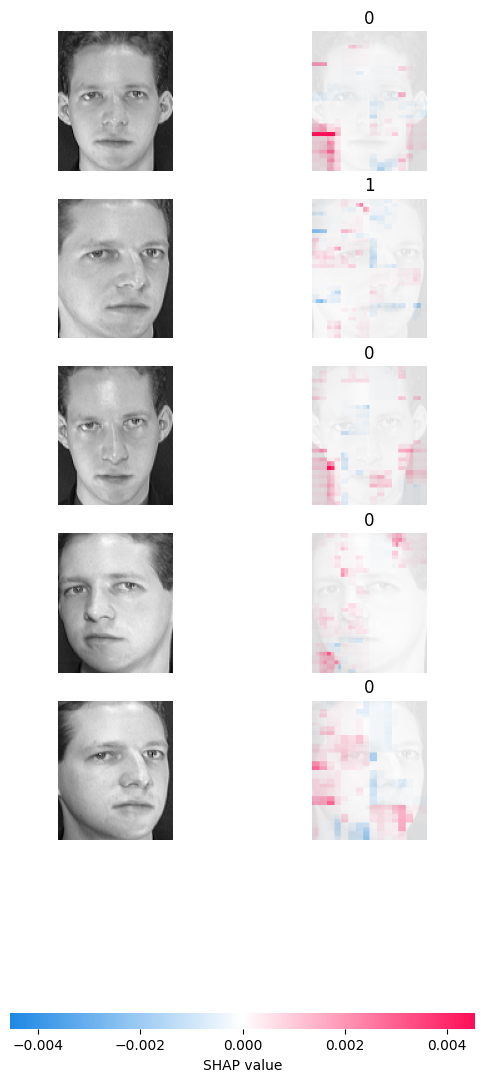

In [13]:
'''def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)'''

masker = shap.maskers.Image("inpaint_telea", x[0].shape)
explainer = shap.Explainer(model, masker, output_names=y)
shap_values = explainer(x[0:5], max_evals=2000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)